# M3.2: Comparison of numerical solutions to reference solutions

by Daniel Leitner, Andrea Schnepf 

## Benchmark M3.2(a)

For the comparison save the results in a text file with two lines, containing comma separated depth values [cm] in the first line, and pressure head [cm] in the second line. Locate the file in the folder `/M32a Numerical results/simulatorname`.  

## Benchmark M3.2(b)

For a comparison save the results in a text file with two lines, containing comma separated depth values [cm] in the first line, and pressure head [cm] in the second line. Locate the file in the folder `/M32b Numerical results/simulatorname`.

We compare different numerical codes by solving the benchmarking problems. The following links lead to Jupyter notebooks describing numerical codes implementing Benchmark M3.2:

* [Homegrown Python Code from Schnepf et al. 2018](Xylem flux - Python code.ipynb)
* [Dumux](Xylem flux - Dumux.ipynb)

In [16]:
import os
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from rsml import * 
from van_genuchten import *

Dumux
yeah
1. Dumux:
from  -498.4342348369011 to -240.76349069826708  cm pressure head



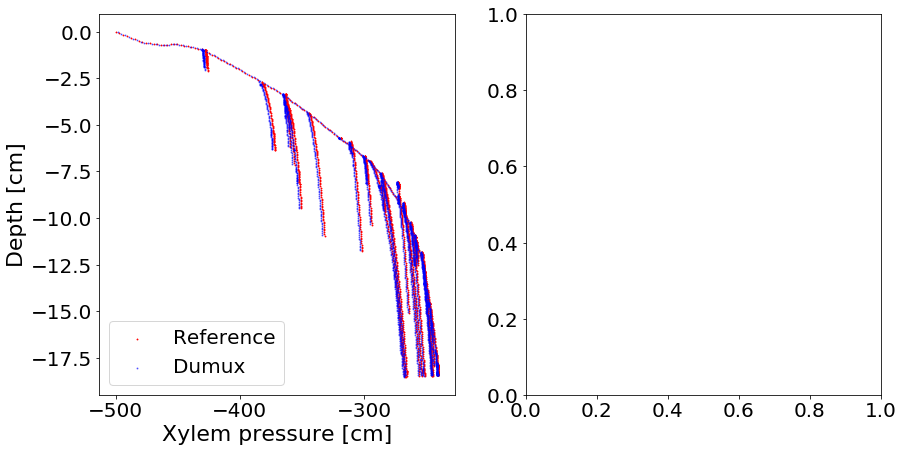

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(14,7)) 

# M32a
l = ["Reference"]
data = np.loadtxt("M3.2a Numerical results/"+l[0],delimiter=',') # analytical solution
z_a = data[0,:]
psi_a = data[1,:]
ax[0].scatter(psi_a, z_a, marker ='*', color = 'red', s=1)
# ax[0].hist(psi_a, bins = 20)

cc = 1
nrsmea, namea = [] ,[]
for dirname, dirnames, filenames in os.walk('M3.2a Numerical results/.'):
    filenames.sort()
    for i,f in enumerate(filenames):
        try:
            print(f)
            if f!="Reference":
                print("yeah")
                l.append(f)
                data = np.loadtxt("M3.2a Numerical results/"+f,delimiter=',')        
                print(str(i+1)+". "+f+":")
                print("from ", min(data[1,:]), "to", max(data[1,:]), " cm pressure head\n")        
                ax[0].scatter(data[1,:], data[0,:], color = col[cc,:], alpha = 0.5, s=1)
                # ax[0].hist(data[1,:], bins = 20, alpha = 0.5)
                z_n = data[0,:]
                psi_n = data[1,:]
                interp = interp1d(z_n, psi_n,  kind='linear', fill_value='extrapolate', bounds_error = False) 
                psi_n = interp(z_a)                 
                nrsmea.append(nRMSE(psi_a,psi_n))
                namea.append(f)
                cc += 1
                break
        except Exception as ex:
            print("Something went wrong with file "+f)    
            raise            
ax[0].set_xlabel("Xylem pressure [cm]")  
ax[0].set_ylabel("Depth [cm]")  
ax[0].legend(l)

plt.savefig('m32_results.png', dpi=300, bbox_inches = "tight")
plt.show() 

In [35]:
# M32b
data = np.loadtxt("M3.2b Numerical results/"+"Reference",delimiter=',') # analytical solution

z_a = data[0,:]
psi_a = data[1,:]
l, nrsmeb, nameb=[],[],[]
for dirname, dirnames, filenames in os.walk('M3.2b Numerical results/.'):
    filenames.sort()
    for i,f in enumerate(filenames):
        try:
            l.append(f)
            data = np.loadtxt("M3.2b Numerical results/"+f,delimiter=',')        
            print(str(i+1)+". "+f+":")
            print("from ", min(data[1,:]), "to", max(data[1,:]), " cm pressure head\n")                    
            pl, = ax[1].plot(data[1,:], data[0,:], color = col[i,:])
            if f!="Reference":
                z_n = data[0,:]; psi_n = data[1,:]
                interp = interp1d(z_n, psi_n,  kind='linear', fill_value='extrapolate', bounds_error =False ) 
                psi_n = interp(z_a)                 
                nrsmeb.append(nRMSE(psi_a,psi_n))  
                nameb.append(f)
        except Exception as ex:
            print("Something went wrong with file "+f)    
            raise

ax[1].set_xlabel("Xylem pressure [cm]")  
ax[1].set_ylabel("Depth [cm]")
ax[0].set_xlim(-530,-170) 
ax[1].set_xlim(-530,-170)
ax[1].legend(l)
plt.show()

1. Dumux:
from  -498.1539086391437 to -199.24160614169216  cm pressure head

2. OpenSimRoot:
from  -496.2 to 0.0  cm pressure head

3. RSWMS:
from  -494.734 to -199.236  cm pressure head

4. Reference:
from  -500.0 to -199.19187726413836  cm pressure head

5. SRI:
from  -500.0 to -199.151  cm pressure head



In [ ]:
import pandas as pd 

data_ = np.array([namea, nrsmea, nrsmeb])
data_ = np.array(data_.transpose())

df = pd.DataFrame(data_, columns = ['Name','nRSME (a)','nRSME (b)'] ) # Create the pandas DataFrame 
df['nRSME (a)'] = df['nRSME (a)'].astype(float)
df['nRSME (a)'] = df['nRSME (a)'].map('{:,.4f}'.format)
df['nRSME (b)'] = df['nRSME (b)'].astype(float)
df['nRSME (b)'] = df['nRSME (b)'].map('{:,.4f}'.format)

df.style.set_table_styles(
[{'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#eee')]}, 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 {'selector': 'th',
  'props': [('background', '#606060'), 
            ('color', 'white'),
            ('font-family', 'verdana')]},
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},
]
).hide_index()

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

fig,ax = render_mpl_table(df, header_columns=0, col_width=2.0)
fig.savefig("table_m32.png")